# Building a Rainfall Prediction Classifier

### About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



In [2]:
# install the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

Sunshine and cloud seems like important features, but may have mising values

In [5]:
# drop all rows with missing values

df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### some features that would be inefficient in predictiong tomorrows rainfall are 

- Evaporation
- Cloud Cover
- Sunshine
- Rainfall (to prevent data leakage)
- Temp3pm, Temp9am
- Pressure9am, Pressure 3pm
- Cloud9am, Cloud3pm
- Humidity9am, Humidity3pm
- WindSpeed9am, Windspeed3pm
- WindDir3pm, WindDir9am

If we adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then we can legitimately utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether you will bike to work today.

With this new target, we should update the names of the rain columns accordingly to avoid confusion.

In [7]:
df = df.rename(columns= {'RainToday':'RainYesterday',
                         'RainTommorow':'RainToday'})

### Data Granularity
Would the weather patterns have the same predictability in vastly different locations in Australia? I would think not.  
The chance of rain in one location can be much higher than in another. 
Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.  
Let's see how many observations we have for each location, and see if we can reduce our attention to a smaller region.

### Location Selection
Watsonia is only 15 km from Melbourne, and the Melbourne Airport is only 18 km from Melbourne.  
Let's group these three locations together and use only their weather data to build our localized prediction model.  
Because there might still be some slight variations in the weather patterns we'll keep `Location` as a categorical variable.

In [8]:
df = df[df.Location.isin(['Melbourne', 'MelbourneAirport', 'Watsonia'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

We still have 7557 records, which should be enough to build a reasonably good model.

## Extracting a seasonality feature
Now consider the `Date` column. We expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.  
There may be some variation with `Year` as well, but we'll leave that out for now.
Let's engineer a `Season` feature from `Date` and drop `Date` afterward, since it is most likely less informative than season. 
An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the `Date` column.

In [9]:
# create a function to map dates to seasons

def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

## Exercise 1: Map the dates to seasons and drop the Date column

In [10]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to 'Date'
df['Season'] = df['Date'].apply(date_to_season)

df=df.drop(columns='Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainTomorrow,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


## Exercise 2. Define the feature and target dataframes

In [11]:
x = df.drop(columns=['RainTomorrow','MaxTemp','Evaporation','WindGustDir'], axis=1)
y = df['RainTomorrow']

## Exercise 3. How balanced are the classes?
Display the counts of each class.

In [12]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     5766
Yes    1791
Name: count, dtype: int64

This means that 76.3% of samples are 'No' and 23.6% of them are 'Yes'

## Exercise 4. What can you conclude from these counts?
- How often does it rain annualy in the Melbourne area?
- How accurate would you be if you just assumed it won't rain every day?
- Is this a balanced dataset?
- Next steps?

- It rains about 24% of the days in Melbourne area, which is roughly 88 days a year.
- I would be about 76% accurate if assumed that it won't rain everyday
- No this isn't a balanced dataset as No labels dominate the Yes labels
- We can reduce the No samples or increase the Yes samples.

### Exercise 5. Split data into training and test sets, ensuring target stratification


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

### Define preprocessing transformers for numerical and catrgorical features

### Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features


In [14]:
numeric_features = x_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object','category']).columns.tolist()

In [15]:
# Define separate transformers for both feature types and combine them into a single preprocessing transformer

# Scale numeric features
num_trans = Pipeline([('scaler',StandardScaler())])

# One hot encoding for categoricals
cat_trans = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Exercise 7. Combine the transformers into a single preprocessing column transformer

In [16]:
preprocessor = ColumnTransformer([('num', num_trans, numeric_features),
                                  ('cat', cat_trans, categorical_features)])


### Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier

In [17]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('classifier', RandomForestClassifier(random_state=42))])

In [18]:
# Define parameter grid to use in cross validation and grid search cv

In [19]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

#### Perform grid search cross-validation and fit the best model to the training data


In [20]:
# Select a cross-validation method, ensuring target stratification during validation

cv = StratifiedKFold(n_splits=5, shuffle=True)

### Exercise 9. Instantiate and fit GridSearchCV to the pipeline

In [21]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'Rainfall',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',
                                                                          'Cloud9am',
                                                                          'C...
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [22]:
#Print the best parameters and best crossvalidation score

bp = grid_search.best_params_
cv_score = grid_search.best_score_

In [23]:
print('The best parameters are:', bp,'\n\nThe best Corss validation score is:', cv_score)

The best parameters are: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100} 

The best Corss validation score is: 0.8474772539288669


### Exercise 10. Display your model's estimated score

In [24]:
ts = grid_search.score(x_test, y_test)
print('The test score is:', ts)

The test score is: 0.8445767195767195


So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.  
But careful here. Let's take a deeper look at the results.

The best model is stored within the gridsearch object.


### Exercise 11. Get the model predictions from the grid search estimator on the unseen data

In [25]:
y_pred = grid_search.predict(x_test)

### Exercise 12. Print the classification report

In [26]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.87      0.94      0.90      1154
         Yes       0.74      0.53      0.62       358

    accuracy                           0.84      1512
   macro avg       0.80      0.74      0.76      1512
weighted avg       0.84      0.84      0.83      1512



**Precision for "Yes" is 0.74:** When the model predicts rain, it's correct 74% of the time.

**Recall for "Yes" is only 0.51:** It only catches 51% of actual rainy days—meaning it's missing nearly half of them.

**F1-Score for "Yes" is 0.60:** This harmonic mean of precision and recall shows the model struggles more with rainy days than dry ones.

**Accuracy: 0.84** — The model is correct 84% of the time.

**Macro Avg:** Precision (0.80), Recall (0.73), F1 (0.75) — Treats both classes equally, showing a drop due to poor recall on "Yes".

**Weighted Avg:** Precision (0.83), Recall (0.84), F1 (0.83) — Accounts for class imbalance, skewed toward the majority class ("No").

### Key Takeaways
- The model is very good at predicting dry days (high recall and precision for "No").

- It struggles to detect rainy days, which could be critical depending on the use case (e.g., weather alerts).

- The class imbalance (1154 "No" vs. 358 "Yes") likely contributes to the lower performance on the minority class.

## Exercise 13. Plot the confusion matrix 

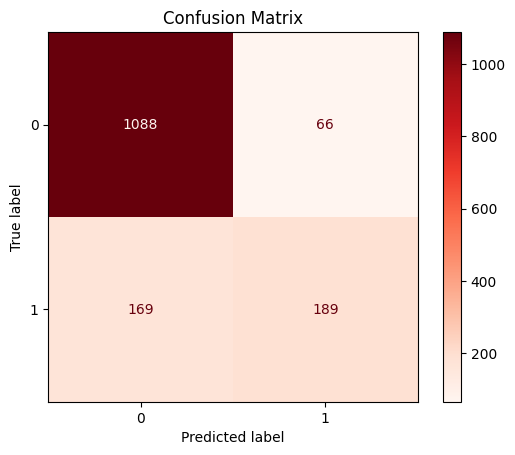

In [27]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

- From the confisuon matrix, True positive=189 and False negative=169
- This means that the model correctly identified 189 labels as 'No' and incorrectly identified 169 'Yes' labels as 'No'
- True positive rate = true positive / (true positive + false negative)
- Thus the True positive rate of the Ranfom Forest model is 53%

In [40]:
# what is thr true positive rate of the RandomForest model? tp- true positive, fn-false negative, tpr-true positive rate
import numpy as np
tp=189
fn=169
tpr = tp / (tp+fn)
print('The true positive rate is:',np.round(tpr*100,2),'%')

The true positive rate is: 52.79 %


### Exercise 14. Extract the feature importances

In [29]:
feat_imp = grid_search.best_estimator_['classifier'].feature_importances_

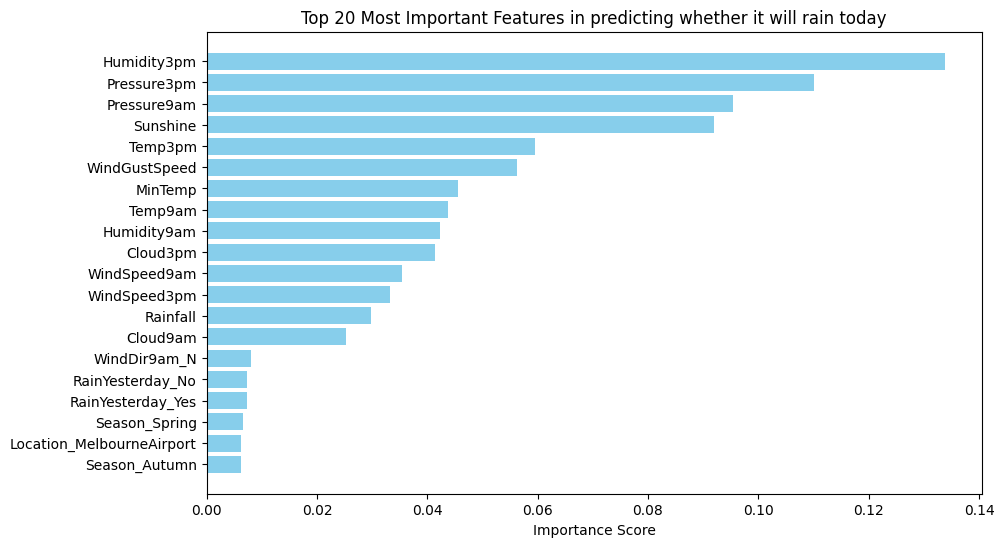

In [30]:
f_name = list(grid_search.best_estimator_['preprocessor']
              .named_transformers_['cat']
              .named_steps['onehot']
              .get_feature_names_out(categorical_features))

feat_names = numeric_features + f_name
imp_df = pd.DataFrame({'Feature':feat_names,
                       'Importance':feat_imp}).sort_values(by='Importance', ascending=False)

n=20 
top_features = imp_df.head(n)

#plot
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {n} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

The most important feature for predicting whether it it will rain on the feature importance bar graph is **Humidity3pm**

### Try another model

### Exercise 15. Update the pipeline and the parameter grid

In [31]:
pipe.set_params(classifier=LogisticRegression(random_state=42))

grid_search.estimator = pipe

pg = {
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = pg

grid_search.fit(x_train,y_train)

y2_pred = grid_search.predict(x_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

Test-1
               precision    recall  f1-score   support

          No       0.87      0.94      0.90      1154
         Yes       0.74      0.53      0.62       358

    accuracy                           0.84      1512
   macro avg       0.80      0.74      0.76      1512
weighted avg       0.84      0.84      0.83      1512


Test-2
               precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.68      0.50      0.58       358

    accuracy                           0.83      1512
   macro avg       0.77      0.71      0.73      1512
weighted avg       0.81      0.83      0.82      1512



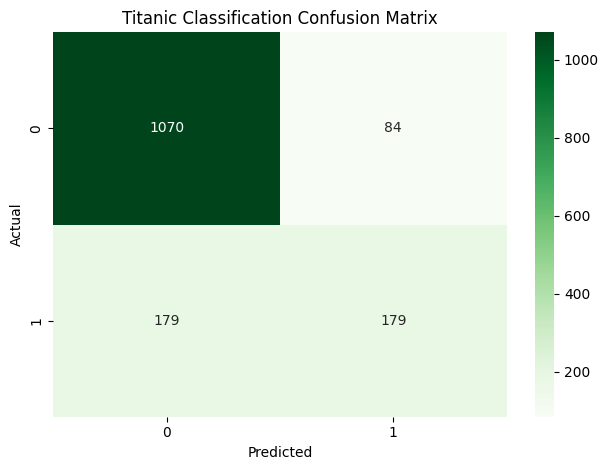

In [32]:
# compare the results with previous model
print('Test-1\n',classification_report(y_test, y_pred))
print('\nTest-2\n', classification_report(y_test, y2_pred))

cm2 = confusion_matrix(y_test, y2_pred)
plt.figure()
sns.heatmap(cm2, annot=True, cmap='Greens', fmt='d')
# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
# true positive rate of LogisticRegression model. a-true positive, b-false negative, c-true positive rate 
a = 179
b = 179
c = a / (a+b)
print('The true positive rate is:',(c*100),'%')

The true positive rate is: 50.0 %


- Comparing the RandomForest and LogisticRegression models, RandomForest performed better in terms of accuracy and True positive rate.
- The accuracy for both models were almost the same.For RandomForest model it is 84%, while for the Logistic regression model it is 83%.
- The true positive rate for both models are almost the same. For RandomForest mdoel  it was 53%, whereas for Logistic regression, it was 50%.
- Althouth both models performed the same, RandomForest model is slightly better at predicting the likelihood of rainfall in the region, than Logistic regression.